<a href="https://colab.research.google.com/github/MatthewSebastian15/datacomp/blob/main/DataComp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **Data Preparation** 🧹

In [2]:
  # from google.colab import files
  # uploaded = files.upload()

In [3]:
df = pd.read_csv("public-transport.csv")

In [4]:
df.head(3)

transID         payCardID payCardBank     payCardName payCardSex  \
0  EIIW227B8L34VB   180062659848800      emoney  Bajragin Usada          M   
1  LGXO740D2N47GZ  4885331907664776         dki    Gandi Widodo          F   
2  DJWR385V2U57TO  4996225095064169         dki   Emong Wastuti          F   

   payCardBirthDate corridorID                              corridorName  \
0              2008          5                     Matraman Baru - Ancol   
1              1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
2              1992        R1A                        Pantai Maju - Kota   

   direction tapInStops  ... tapInStopsLon  stopStartSeq            tapInTime  \
0        1.0     P00142  ...     106.84402             7  2023-04-03 05:21:44   
1        0.0    B01963P  ...     106.83302            13  2023-04-03 05:42:44   
2        0.0    B00499P  ...     106.81435            38  2023-04-03 05:59:06   

   tapOutStops        tapOutStopsName tapOutStopsLat tapOutStopsLon  \
0       P00253                Tegalan      -6.203101      106.85715   
1      B03307P    Sampoerna Strategic      -6.217152      106.81892   
2      B04962P  Simpang Kunir Kemukus      -6.133731      106.81475   

   stopEndSeq           tapOutTime  payAmount  
0        12.0  2023-04-03 06:00:53     3500.0  
1        21.0  2023-04-03 06:40:01     3500.0  
2        39.0  2023-04-03 06:50:55     3500.0  

[3 rows x 22 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [6]:
df.describe()

payCardID  payCardBirthDate     direction  tapInStopsLat  \
count  3.790000e+04      37900.000000  37900.000000   37900.000000   
mean   4.250060e+17       1990.089314      0.500633      -6.214838   
std    1.321699e+18         13.051482      0.500006       0.057911   
min    6.040368e+10       1946.000000      0.000000      -6.394973   
25%    1.800442e+14       1982.000000      0.000000      -6.245863   
50%    3.507947e+15       1990.000000      1.000000      -6.214587   
75%    4.699023e+15       2001.000000      1.000000      -6.175528   
max    4.997694e+18       2012.000000      1.000000      -6.089429   

       tapInStopsLon  stopStartSeq  tapOutStopsLat  tapOutStopsLon  \
count   37900.000000  37900.000000    36556.000000    36556.000000   
mean      106.841554     13.572480       -6.214651      106.841233   
std         0.060369     12.237623        0.059022        0.060999   
min       106.614730      0.000000       -6.394973      106.614730   
25%       106.803470      4.000000       -6.247225      106.801750   
50%       106.834830     10.000000       -6.214718      106.834580   
75%       106.882270     19.000000       -6.174736      106.883030   
max       107.023950     68.000000       -6.091746      107.023660   

         stopEndSeq     payAmount  
count  36556.000000  36893.000000  
mean      21.219909   2699.712683  
std       13.800689   4212.225592  
min        1.000000      0.000000  
25%       11.000000      0.000000  
50%       18.000000   3500.000000  
75%       29.000000   3500.000000  
max       77.000000  20000.000000

In [7]:
df.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

### CorridorID & CorridorName

In [8]:
corridor_map_id_to_name = (
    df[['corridorID', 'corridorName']]
    .dropna()
    .drop_duplicates()
    .set_index('corridorID')['corridorName']
    .to_dict()
)
corridor_map_name_to_id = {v: k for k, v in corridor_map_id_to_name.items()}

df['corridorName'] = df['corridorName'].fillna(df['corridorID'].map(corridor_map_id_to_name))

df['corridorID'] = df['corridorID'].fillna(df['corridorName'].map(corridor_map_name_to_id))

df = df.dropna(subset=['corridorID','corridorName'])

### tapInStops

In [9]:
stop_map_in = (
    df[['tapInStops','tapInStopsName']]
    .dropna()
    .drop_duplicates()
    .set_index('tapInStopsName')['tapInStops']
    .to_dict()
)
df['tapInStops'] = df['tapInStops'].fillna(df['tapInStopsName'].map(stop_map_in))
df = df.dropna(subset=['tapInStops'])

### tapOutStops

In [10]:
stop_map_out = (
    df[['tapOutStops','tapOutStopsName']]
    .dropna()
    .drop_duplicates()
    .set_index('tapOutStopsName')['tapOutStops']
    .to_dict()
)
df['tapOutStops'] = df['tapOutStops'].fillna(df['tapOutStopsName'].map(stop_map_out))
df['tapOutStops'] = df['tapOutStops'].fillna('Unknown')

df['is_complete_trip'] = ~df['tapOutTime'].isnull()

### payAmount & fare_category

In [11]:
corridor_fare_map = df.groupby('corridorID')['payAmount'].median()
df['payAmount'] = df['payAmount'].fillna(df['corridorID'].map(corridor_fare_map))
df['payAmount'] = df['payAmount'].fillna(df['payAmount'].median())

df['fare_category'] = df['payAmount'].apply(
    lambda x: 'Free' if x == 0 else ('Normal' if x <= 3500 else 'Premium')
)

### Time and Duration Data

In [12]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'], errors='coerce')
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'], errors='coerce')

df['duration_minutes'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60
df = df[(df['duration_minutes'] > 0.5) & (df['duration_minutes'] < 240)]

### Time Features

0: Senin

1: Selasa

2: Rabu

3: Kamis

4: Jumat

5: Sabtu

6: Minggu



tapInTime : menggunakan format waktu 0 - 23

0 = jam 00.00–00.59 (tengah malam)

6 = jam 06.00–06.59 (pagi)

17 = jam 17.00–17.59 (sore / jam sibuk)

In [13]:
df['day_of_week'] = df['tapInTime'].dt.dayofweek
df['tapInHour'] = df['tapInTime'].dt.hour

### Distance Feature

Jarak antara halte yang sudah di tempuh

In [14]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return R * 2 * np.arcsin(np.sqrt(a))

df['distance_km'] = haversine(df['tapInStopsLat'], df['tapInStopsLon'],
                              df['tapOutStopsLat'], df['tapOutStopsLon'])

#### **Data Preparation** Pt.2 🧹

In [15]:
# Convert to DateTime
df['tapInTime'] = pd.to_datetime(df['tapInTime'], errors='coerce')
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'], errors='coerce')

# Convert to Numeric
for col in ['tapInStopsLat', 'tapInStopsLon', 'tapOutStopsLat', 'tapOutStopsLon', 'stopStartSeq', 'stopEndSeq', 'payAmount']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# Convert to Categoric
for col in ['payCardSex', 'payCardBank', 'corridorID']:
    df[col] = df[col].astype('category')

In [16]:
print(df.duplicated().sum())

0


In [17]:
# Handling Outlier
df = df[(df['payCardBirthDate'] >= 1900) & (df['payCardBirthDate'] <= 2025)] # Rentang Umur
df['payAmount'] = df['payAmount'].clip(lower=0) # Saldo jangan negatif

df = df[(df['tapInStopsLat'].between(-6.4, -6.0)) & (df['tapInStopsLon'].between(106.6, 107.0))] # Utk sekarang lokasi di set ke Jakarta, bisa diubah
df = df[(df['is_complete_trip']) & (df['stopEndSeq'] > df['stopStartSeq'])]

#### **Feature** Engineering 🧱

In [18]:
df['age'] = 2025 - df['payCardBirthDate']

df['duration_minutes'] = df.apply(
    lambda x: (x['tapOutTime'] - x['tapInTime']).total_seconds() / 60
    if x['is_complete_trip'] else np.nan, axis=1)

df['day_of_week'] = df['tapInTime'].dt.day_name()

df['tapInHour'] = df['tapInTime'].dt.hour

In [19]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

df['distance_km'] = df.apply(
    lambda x: haversine(x['tapInStopsLat'], x['tapInStopsLon'], x['tapOutStopsLat'], x['tapOutStopsLon'])
    if x['is_complete_trip'] else np.nan, axis=1)

df['fare_category'] = pd.cut(df['payAmount'], bins=[-1, 0, 3500, float('inf')], labels=['Free', 'Standard', 'Premium'])

#### **Validation** 🏒

In [20]:
print(df.isnull().sum())

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
is_complete_trip    0
fare_category       0
duration_minutes    0
day_of_week         0
tapInHour           0
distance_km         0
age                 0
dtype: int64


In [21]:
df['duration_minutes'].tail()

37895     97.200000
37896     35.850000
37897    177.633333
37898     28.400000
37899     26.683333
Name: duration_minutes, dtype: float64

In [22]:
df = df[df['duration_minutes'].ge(0) | df['duration_minutes'].isnull()]

#### **EDA** (*Exploratory Data Analysis*)

In [23]:
sns.set(style='whitegrid')

a. Demographic Analysis

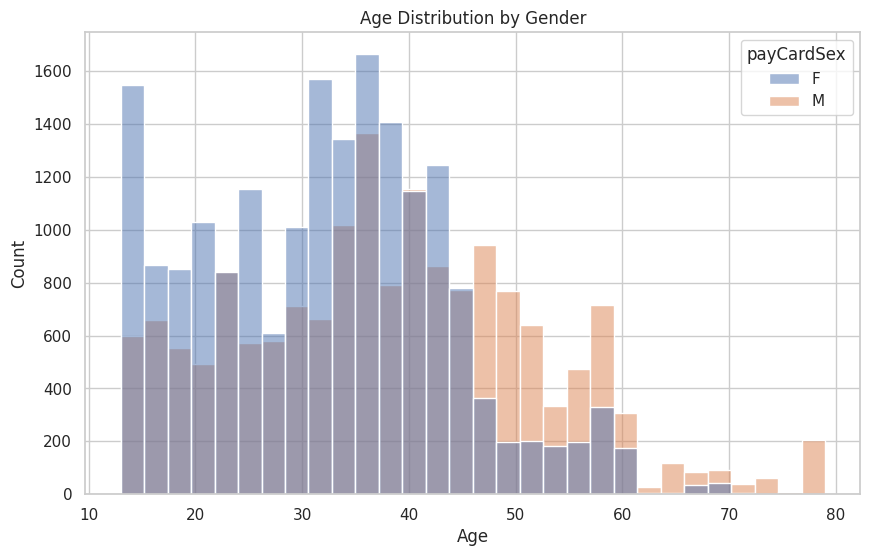

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='payCardSex', bins=30)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

b. Temporal Analysis (Identify Rush Hours)

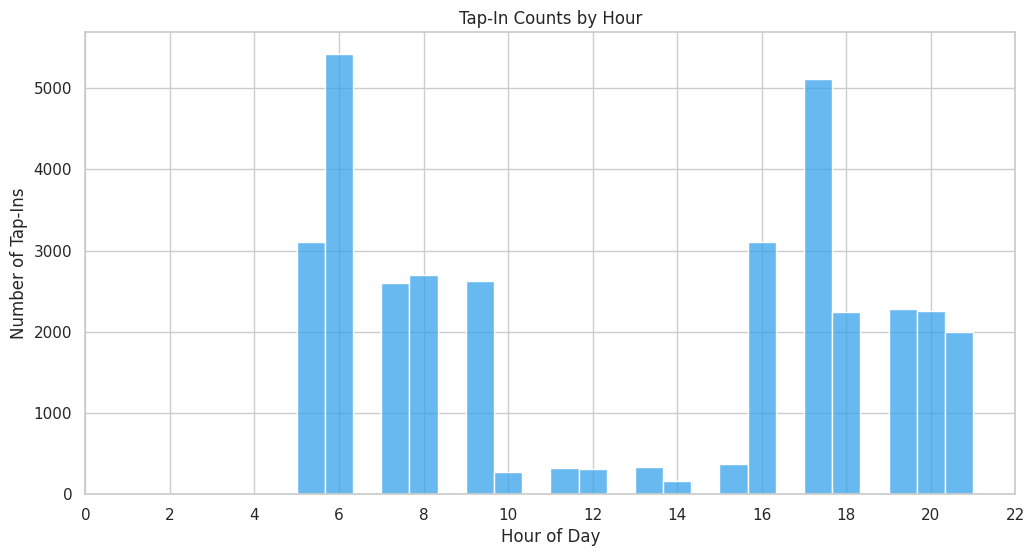

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tapInHour', bins=24, color='#36A2EB')
plt.title('Tap-In Counts by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tap-Ins')
plt.xticks(ticks=range(0, 24, 2))
plt.show()

c. Route and Spatial Analysis

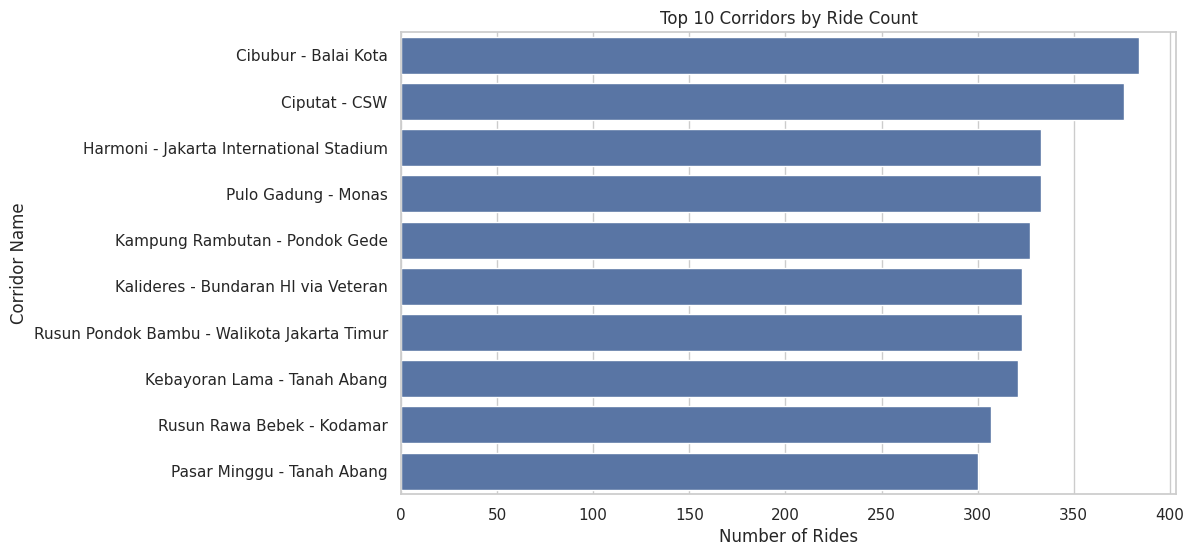

                                         transID  payAmount  duration_minutes
corridorName                                                                 
Cibubur - Balai Kota                         384    20000.0         72.214453
Ciputat - CSW                                376     3500.0         76.091090
Harmoni - Jakarta International Stadium      333     3500.0         71.931281
Pulo Gadung - Monas                          333     3500.0         71.594645
Kampung Rambutan - Pondok Gede               327        0.0         71.904434


In [26]:
top_corridors = df['corridorName'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corridors.values, y=top_corridors.index)
plt.title('Top 10 Corridors by Ride Count')
plt.xlabel('Number of Rides')
plt.ylabel('Corridor Name')
plt.show()

summary = df[df['is_complete_trip']].groupby('corridorName').agg({
    'transID': 'count',
    'payAmount': 'mean',
    'duration_minutes': 'mean'
}).sort_values('transID', ascending=False).head(5)
print(summary)

d. Fare Analysis

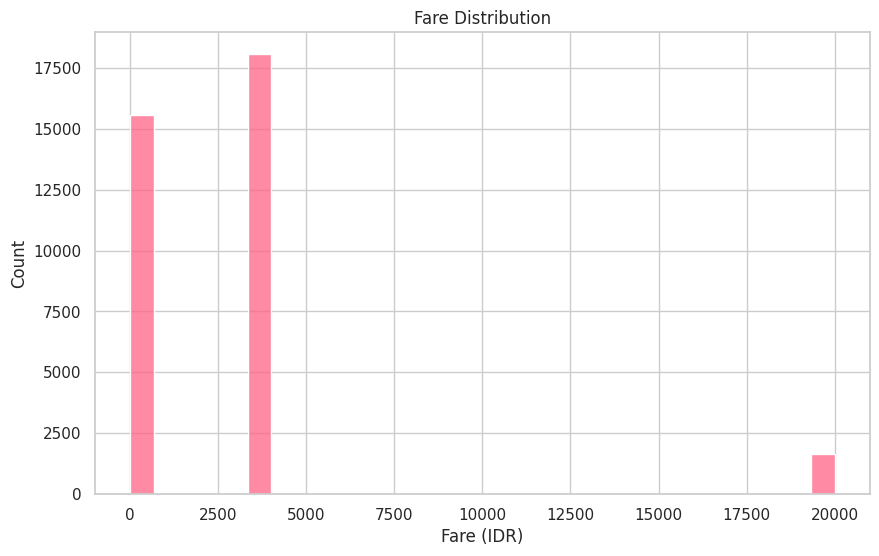

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='payAmount', bins=30, color='#FF6384')
plt.title('Fare Distribution')
plt.xlabel('Fare (IDR)')
plt.ylabel('Count')
plt.show()

e. General Map Analysis

In [28]:
import folium
import pandas as pd

# Aggregate tap-in counts by stop
stop_counts = df.groupby(['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon']).size().reset_index(name='tap_in_count')

# Create a map centered on Jakarta
m = folium.Map(location=[-6.2, 106.8], zoom_start=12)

# Add markers for each stop, sized by tap-in count
for _, row in stop_counts.iterrows():
    folium.CircleMarker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']],
        radius=min(row['tap_in_count'] / 100, 20),  # Scale radius, cap at 20
        popup=f"{row['tapInStopsName']}: {row['tap_in_count']} tap-ins",
        fill=True,
        fill_color='blue',
        color='blue',
        fill_opacity=0.6
    ).add_to(m)

# Save the map
# m.save('jakarta_tapin_map.html')

In [29]:
from IPython.display import display
display(m)